In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [2]:
dataset=pd.read_csv('insurancedata.csv')

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
dataset.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
dataset.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
dataset.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

Text(0, 0.5, 'Frequency')

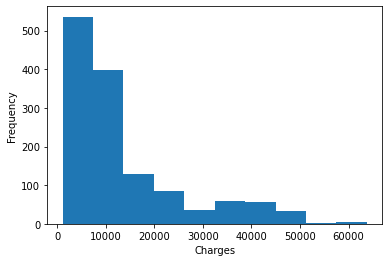

In [11]:
plt.hist(x=dataset.expenses)
plt.xlabel("Charges")
plt.ylabel("Frequency")

In [12]:
le=LabelEncoder()
#female=0 male=1
le.fit(dataset.sex.drop_duplicates())
dataset.sex=le.transform(dataset.sex)
#yes=1 no=0
le.fit(dataset.smoker.drop_duplicates())
dataset.smoker=le.transform(dataset.smoker)

#northeast=0  northwest=1   southeast=2    southwest=3
le.fit(dataset.region.drop_duplicates())
dataset.region=(le.transform(dataset.region))






In [13]:
dataset.region.value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [14]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


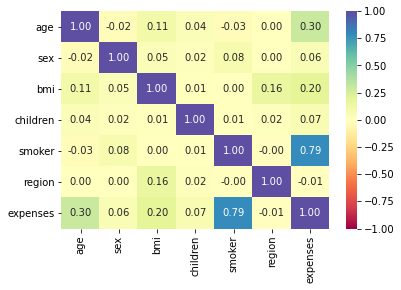

In [15]:
corr=dataset.corr()
ax=sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True, fmt='.2f', cmap='Spectral')

smoker,age,bmi has high correlation

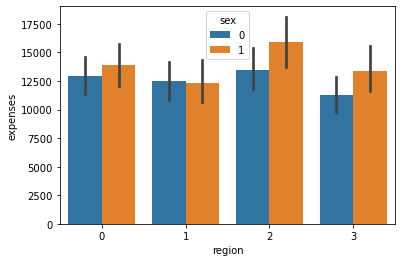

In [16]:
ax=sns.barplot(x='region',y='expenses',hue='sex',data=dataset)

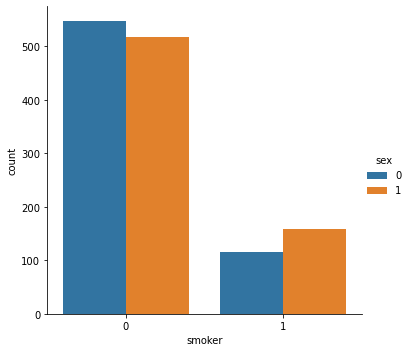

In [17]:
ax=sns.catplot(x='smoker',kind='count',hue='sex',data=dataset)

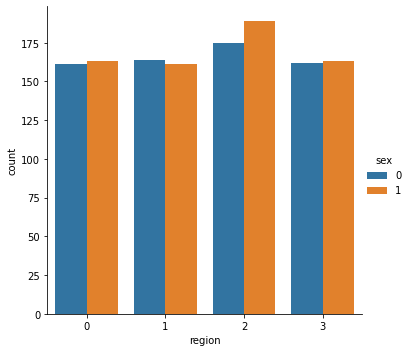

In [18]:

ax=sns.catplot(x='region',kind='count',hue='sex',data=dataset)

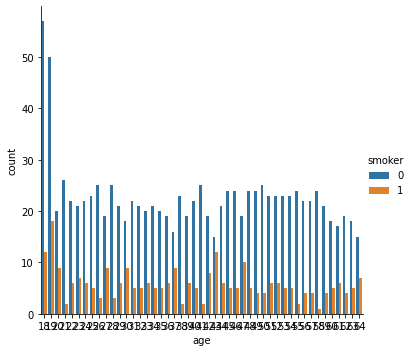

In [19]:
ax=sns.catplot(x='age',kind='count',hue='smoker',data=dataset)


In [20]:
b=(0,18,24,40,60,np.inf)
l=('0-18','19-24','25-40','41-60','60-60+')
grp=pd.cut(dataset.age,bins=b,labels=l)

In [21]:
dict={'Age':dataset.age,'Age_Group':grp,'Smoker':dataset.smoker}
AgeD=pd.DataFrame(data=dict)

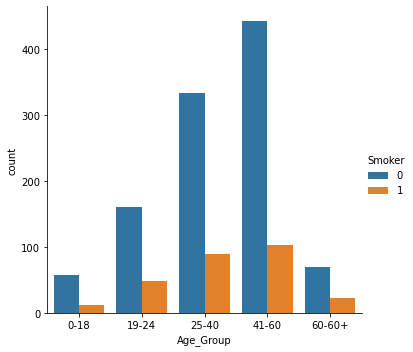

In [22]:
ax=sns.catplot(x='Age_Group',kind='count',hue='Smoker',data=AgeD)

Age group between 19- 60 has more smokers

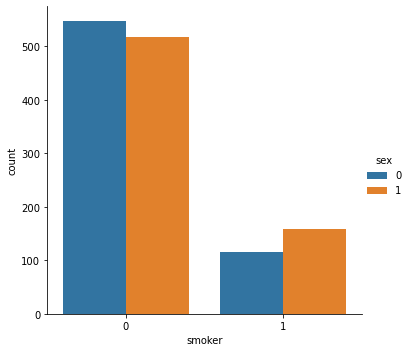

In [23]:
ax=sns.catplot(x='smoker',kind='count',hue='sex',data=dataset)

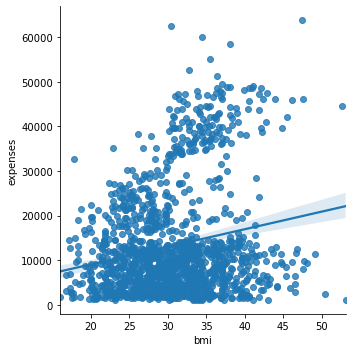

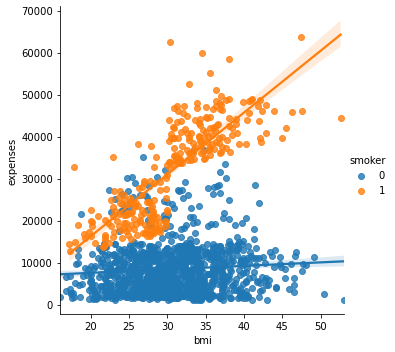

In [24]:
ax=sns.lmplot(x='bmi',y='expenses',data=dataset)
ax=sns.lmplot(x='bmi',y='expenses',hue='smoker',data=dataset)


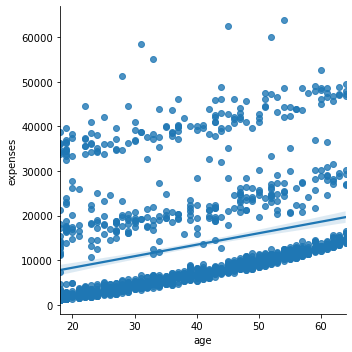

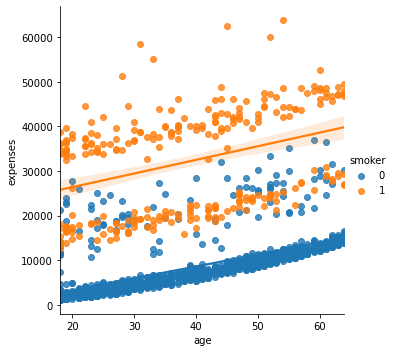

In [25]:
ax=sns.lmplot(x='age',y='expenses',data=dataset)
ax=sns.lmplot(x='age',y='expenses',hue='smoker',data=dataset)


It is observed that most of the smokers are giving high premium

## Modelling

In [26]:
X=dataset.drop(['expenses'],axis=1)
y=dataset.expenses

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

### Linear Regression

In [28]:
modelLR=LinearRegression()
modelLR.fit(X_train,y_train)
y_hat_train=modelLR.predict(X_train)
y_hat_test=modelLR.predict(X_test)
print("R- Squared:  ",round(modelLR.score(X_test,y_test)*100,2))
print("Mean Absolute Error:  ",mean_absolute_error(y_test,y_hat_test))
print("Mean Squared Error:  ",mean_squared_error(y_test,y_hat_test))



R- Squared:   79.99
Mean Absolute Error:   3930.2173746197864
Mean Squared Error:   31841055.888540454


<AxesSubplot:>

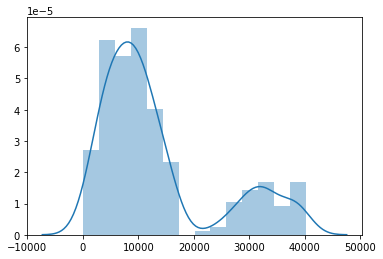

In [29]:
sns.distplot(y_hat_test)

<AxesSubplot:xlabel='expenses'>

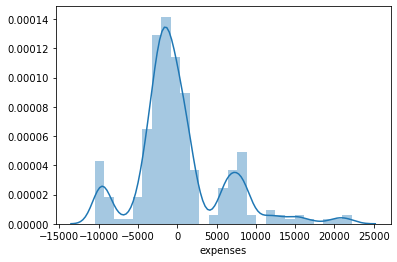

In [30]:
sns.distplot(y_test-y_hat_test)

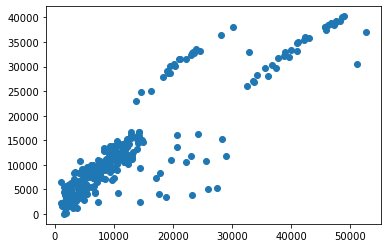

In [31]:
plt.scatter(y_test,y_hat_test)

### Setting hyperparameter for Decision tree, Random forest and XGBoost

In [32]:
#set no of trees
nestimators=[int(x) for x in np.linspace(start=100,stop=1000,num=10)]
#Max features at every split
max_ft=['auto','sqrt','log2']
#max no of levels in each tree
max_dep=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
#min no of sample to split a node
min_samples_split=[2,5,10,15,100]

#min no of sample to consider at each node
min_sample_leaf=[1,2,5,10]

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
tree_param={
    'max_features':max_ft,
    'max_depth':max_dep,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_sample_leaf
}
print(tree_param)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [35]:
param={
    'n_estimators':nestimators,
    'max_features':max_ft,
    'max_depth':max_dep,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_sample_leaf
}
print(param)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


## Decision Trees

In [36]:
tree=DecisionTreeRegressor()

In [37]:
tree.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')>

In [38]:
tree_rand=RandomizedSearchCV(estimator=tree,param_distributions=tree_param,n_jobs=1,n_iter=10,cv=5,verbose=2,random_state=0)

In [39]:
tree_rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.0s
[CV] min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=20 
[CV]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=10, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=10 
[CV]  min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=10, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=10 
[CV]  min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=10, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=10 
[CV]  min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=10, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=5, max_features=log2, max_depth=20 
[CV]  min_samples_split=10, min_samples_leaf=5, max_features=log2, max_depth=20, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=5, max_features=log2, max_depth=20 
[CV]  min_samples_split=10, min_samples_leaf=5, max_features=log2, max_depth=20, total=   0.0s
[CV] min_samples_split=10, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=10, n_jobs=1,
                   param_distr

In [40]:
tree_p=tree_rand.predict(X_test)

<AxesSubplot:xlabel='expenses'>

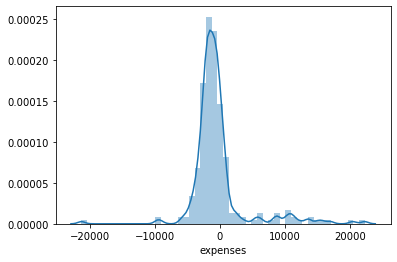

In [41]:
sns.distplot(y_test-tree_p)

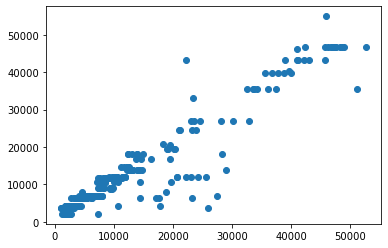

In [42]:
plt.scatter(y_test,tree_p)

In [43]:
print('Mean Squared Error',mean_squared_error(y_test, tree_p))
print('R squared',round(tree_rand.score(X_test,y_test)*100,2))

Mean Squared Error 18302260.109528106
R squared 88.5


## Random Forest

In [44]:
rf=RandomForestRegressor()

In [45]:
rf_R=RandomizedSearchCV(estimator=rf,param_distributions=param,n_jobs=1,n_iter=10,cv=5,verbose=2,random_state=0)

In [46]:
rf_R.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.6s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   2.3s
[CV] n_estimators=800, min_samples_split=2, m

[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total=   0.9s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total=   0.9s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total=   0.8s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total=   0.8s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total=   0.8s
[CV] n_estimators=800, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   54.6s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [49]:
rf_P=rf_R.predict(X_test)

<AxesSubplot:xlabel='expenses'>

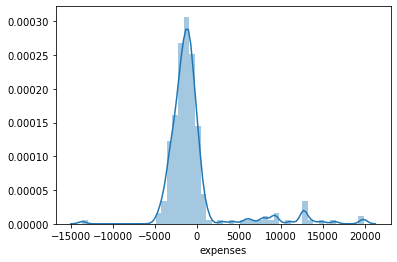

In [50]:
sns.distplot(y_test-rf_P)

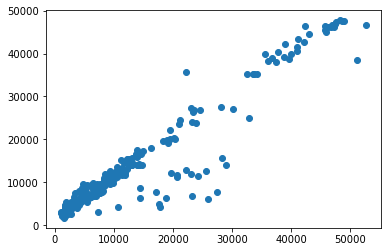

In [51]:
plt.scatter(y_test,rf_P)

In [96]:
print('Mean Squared Error',mean_squared_error(y_test, rf_P))
print('R squared',round(rf_R.score(X_test,y_test)*100,2))

Mean Squared Error 15879877.965253145
R squared 90.02


## XGBoost

In [48]:
xg=xgb.XGBRegressor()

In [49]:
xg_R=RandomizedSearchCV(estimator=xg,param_distributions=param,n_jobs=1,n_iter=10,cv=5,verbose=2,random_state=0)

In [50]:
xg_R.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[09:34:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.8s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[09:34:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.8s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[09:34:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.8s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[09:34:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min

[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=15, total=   0.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[09:34:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[09:34:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_sam

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10 
[09:34:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10 
[09:34:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min

[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total=   0.6s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10 
[09:34:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10, total=   0.5s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=log2, max_depth=10 
[09:34:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   40.2s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                                          verbosity=None),
                   iid='warn', n_iter=10, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max

In [52]:
xg_P=xg_R.predict(X_test)

<AxesSubplot:xlabel='expenses'>

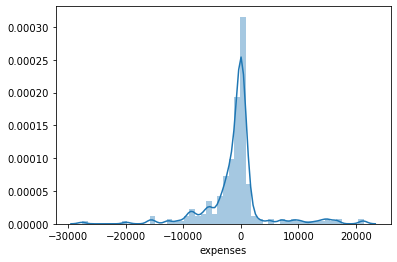

In [53]:
sns.distplot(y_test-xg_P)

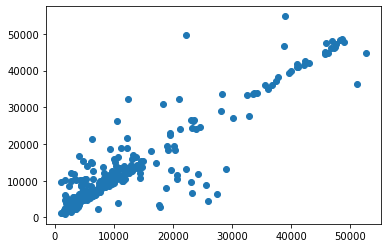

In [54]:
plt.scatter(y_test,xg_P)

In [55]:
print('Mean Squared Error',mean_squared_error(y_test, xg_P))
print('R squared',round(xg_R.score(X_test,y_test)*100,2))

Mean Squared Error 28201589.909949567
R squared 82.28


In [56]:
import pickle
#open a file, where you can store the data
file=open('random_forest.pkl','wb')
#dump informtion
pickle.dump(rf_R,file)
